# DSE 207R FINAL PROJECT
## Fall 2024
### Due Date:  December 10th, 2024

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset (on GitHub) such that it can be used as a URL directly. Don't forget to add your name on top as the author of the notebook.



### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/archive.zip'
fitness_data = pd.read_csv(path)

In [ ]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

I chose this dataset because I was interested in the amount of data it provided, and it immediately made me think of a lot of hypothetical questions when I was exploring it.

In [ ]:
fitness_data.head(n=10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
5,38.0,Female,53.0,1.58,161,128.0,74.0,1.62,953.0,HIIT,23.4,2.5,2.0,2.0,13.02
6,44.0,Female,46.5,1.81,191,142.0,74.0,1.46,1238.0,Cardio,11.9,3.7,2.0,2.0,18.12
7,50.0,Female,88.5,1.63,181,136.0,63.0,1.63,829.0,Strength,11.6,1.8,4.0,2.0,19.16
8,18.0,Female,82.9,1.54,174,169.0,64.0,0.77,802.0,HIIT,27.8,2.2,3.0,1.0,49.84
9,34.0,Female,65.9,1.74,195,169.0,73.0,2.00,1231.0,Yoga,30.5,3.2,5.0,2.0,12.32


In [ ]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [ ]:
fitness_data.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [ ]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

Based on the .info() function, I can see that there are some missing values in each column. Instead of completely getting rid of these values, I decided to fill in each of the missing values with the averages of their respective columns. For the Weight, Height, and BMI columns, I will use the equation BMI = weight(kg)/[height(m)]^2 to aid in filling out the missing values since they are related to each other and because taking the average of those columns to fill in missing values does not make sense to me.

In [ ]:
# Fixing missing weight values
fitness_data['Weight (kg)'] = np.where(fitness_data['Weight (kg)'].isnull(), fitness_data['BMI'] * (fitness_data['Height (m)']**2), fitness_data['Weight (kg)'])

In [ ]:
# Fixing missing height values
fitness_data['Height (m)'] = np.where(fitness_data['Height (m)'].isnull(), np.sqrt(fitness_data['Weight (kg)']/fitness_data['BMI']), fitness_data['Height (m)'])

In [ ]:
# Fixing missing BMI values
fitness_data['BMI'] = np.where(fitness_data['BMI'].isnull(), fitness_data['Weight (kg)']/fitness_data['Height (m)'], fitness_data['BMI'])

In [ ]:
# Checking null values
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1799 non-null   float64
 3   Height (m)                     1799 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [ ]:
fitness_data.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1799.000000,1799.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1800.000000
mean,34.475419,67.493733,1.743372,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,20.316864
std,12.315728,19.830984,0.136497,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,7.244514
min,18.000000,29.218112,1.305875,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.860000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.850000
75%,45.000000,80.000000,1.825000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.657500
max,59.000000,129.900000,3.141549,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,69.095745


Since there is still one value missing in both the Weight and Height columns, I will add it to the list of other numerical columns where I will take the average of those columns to fill in the missing values.

In [ ]:
# Fixing other numerical missing values
fitness_data['Max_BPM'] = pd.to_numeric(fitness_data['Max_BPM'], errors='coerce')
missing_num_vals = ['Age','Weight (kg)', 'Height (m)', 'Max_BPM','Avg_BPM','Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)']
fitness_data[missing_num_vals] = fitness_data[missing_num_vals].fillna(fitness_data[missing_num_vals].mean())

For further data exploration, I decided not to take the average of the Experience_Level column to fill in missing values because it did not make sense to take the average and I was worried it would skew with the decision tree I had planned to do.

In [ ]:
# Fixing categorical missing values
missing_cata_vals = ['Gender', 'Workout_Type']
fitness_data[missing_cata_vals] = fitness_data[missing_cata_vals].fillna('Other')

After further visualization, I noticed that some values in the Workout Type column had '\n' and '\t' in front of them. I decided to fix them so my visualization is more clean.

In [ ]:
# Cleaning the Workout Type column
fitness_data['Workout_Type'] = fitness_data['Workout_Type'].str.replace(r'\nStrength', 'Strength')
fitness_data['Workout_Type'] = fitness_data['Workout_Type'].str.replace(r'\tCardio', 'Cardio')
fitness_data['Workout_Type'] = fitness_data['Workout_Type'].str.replace(r'\tYoga', 'Yoga')

In [ ]:
fitness_data['Workout_Type'].value_counts()

,count
Workout_Type,
Strength,476
Cardio,439
Yoga,435
HIIT,389
Other,61


In [ ]:
# Confirming that all columns are equal to 1800
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Gender                         1800 non-null   object 
 2   Weight (kg)                    1800 non-null   float64
 3   Height (m)                     1800 non-null   float64
 4   Max_BPM                        1800 non-null   float64
 5   Avg_BPM                        1800 non-null   float64
 6   Resting_BPM                    1800 non-null   float64
 7   Session_Duration (hours)       1800 non-null   float64
 8   Calories_Burned                1800 non-null   float64
 9   Workout_Type                   1800 non-null   object 
 10  Fat_Percentage                 1800 non-null   float64
 11  Water_Intake (liters)          1800 non-null   float64
 12  Workout_Frequency (days/week)  1800 non-null   f

In [ ]:
fitness_data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1743.000000,1800.000000
mean,34.475419,67.493733,1.743372,180.233070,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,20.316864
std,12.281451,19.825472,0.136459,11.383915,15.092083,7.894480,0.369954,325.945879,5.839416,0.705470,0.932548,0.746568,7.244514
min,18.000000,29.218112,1.305875,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.750000,52.300000,1.650000,170.000000,134.000000,57.000000,1.140000,800.000000,20.500000,2.100000,3.000000,1.000000,14.860000
50%,33.000000,65.300000,1.730000,180.616535,146.000000,65.000000,1.370000,1033.698931,24.200000,2.706644,3.000000,2.000000,18.850000
75%,45.000000,80.000000,1.822500,190.000000,159.000000,72.000000,1.630000,1246.250000,27.500000,3.300000,4.000000,2.000000,23.657500
max,59.000000,129.900000,3.141549,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,69.095745


### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

**#1 Does gender and age have an affect on the choice of a workout type?**

**Choice:** I was curious to know if gender and age had an affect on the types of workouts someone might do. I assumed that younger men would be more interested in strength, middle aged women interested in yoga, etc. I chose a Facet grid to represent this question because I wanted to be able to easily see the distribution of the ages of males and females to see if there was a trend in gender vs the types of workouts.

**#2 Is there a correlation between calories burned, session duration, workout frequency, water intake, and fat percentage?**

**Choice:** I chose a correlation heatmap for this question because I figured that these columns have some relation to each other and the heatmap makes it easy to see if there is one category that strongly correlates with another or not at all

**#3 How accurate can a model predict the experience level based on other factors?**


**Choice:** I chose a decision tree for this question because I wanted to see if the input variables were able to predict if there was some correlation between them and experience level, and deciding if certain data points classified as beginner, intermediate, or advanced.

In [ ]:
fitness_data['Experience_Level'] = fitness_data['Experience_Level'].dropna()

In [ ]:
# Train and test split
X = fitness_data[['Age', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'BMI']]
y = fitness_data['Experience_Level']

In [ ]:
# Label encoder
experience_level = LabelEncoder()
y = experience_level.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.1, random_state=10)

In [ ]:
# Fitting the model
fitness_tree = DecisionTreeClassifier(max_depth=10)

In [ ]:
fitness_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [ ]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

**#1 Does gender and age have an affect on the choice of a workout type?**

<Figure size 1400x1000 with 0 Axes>

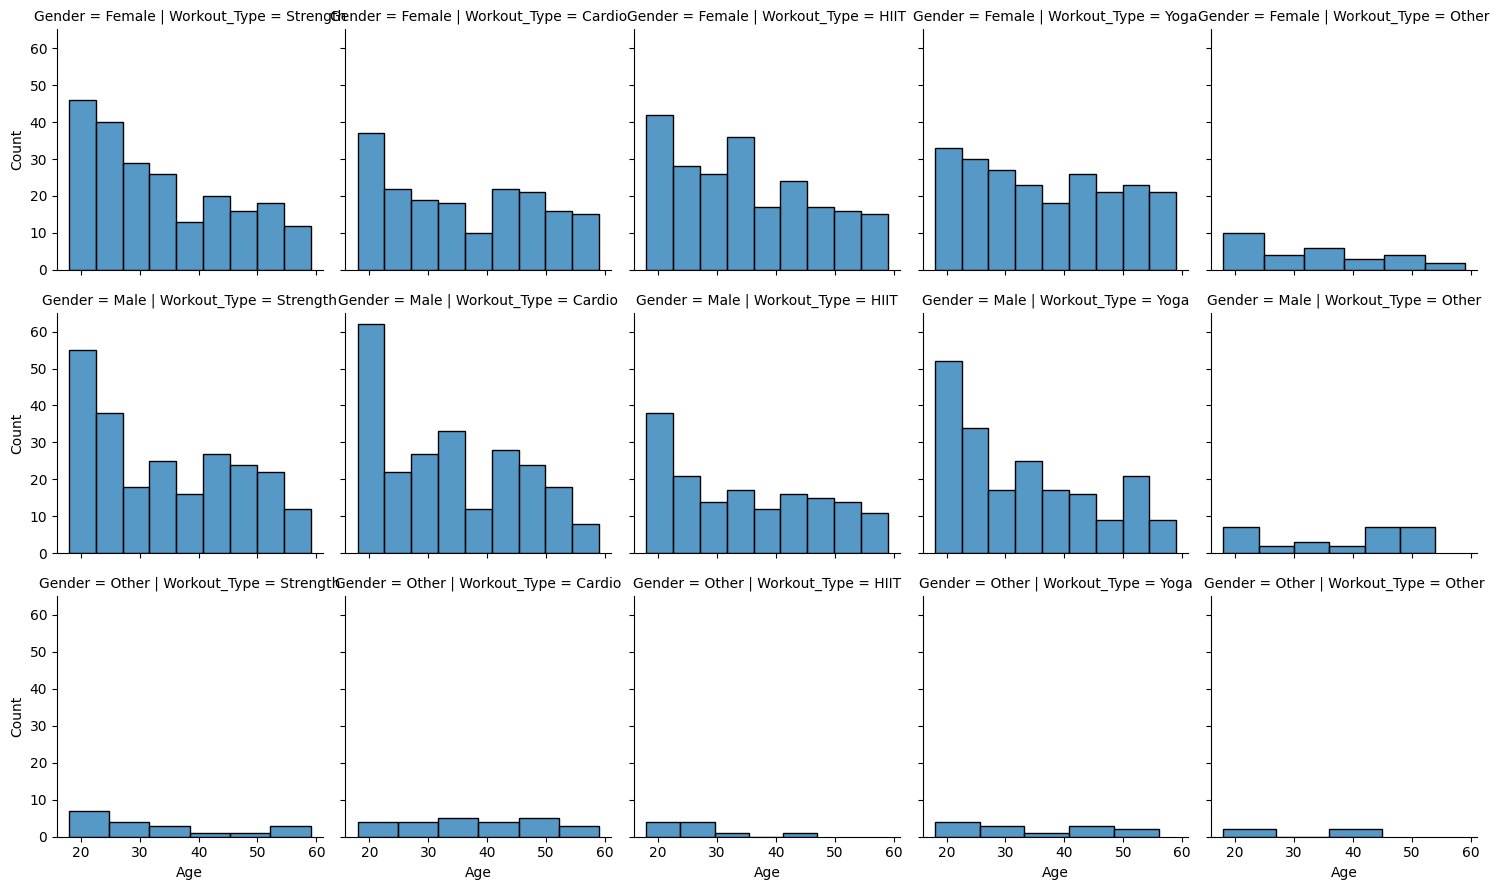

In [ ]:
plt.figure(figsize=(14,10))
g = sns.FacetGrid(data=fitness_data, col='Workout_Type', row='Gender')
g.map(sns.histplot, 'Age')
plt.show()

**Inference:** In general, we can clearly see that younger males, females, and unknown/other are interested in all types of workouts. With this dataset, we can assume that the majority of the data we have is from individuals aged 18-30. Aside from that, we can see that there are minimal differences between age, gender, and workout type. The only differences I can clearly notice are a more amount of females than males in yoga, more males than females in cardio, and more females than males in HIIT.

**#2 Is there a correlation between calories burned, session duration, workout frequency, water intake, and fat percentage?**

In [ ]:
fitness_filtered = fitness_data[['Calories_Burned', 'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Fat_Percentage', 'Water_Intake (liters)']]

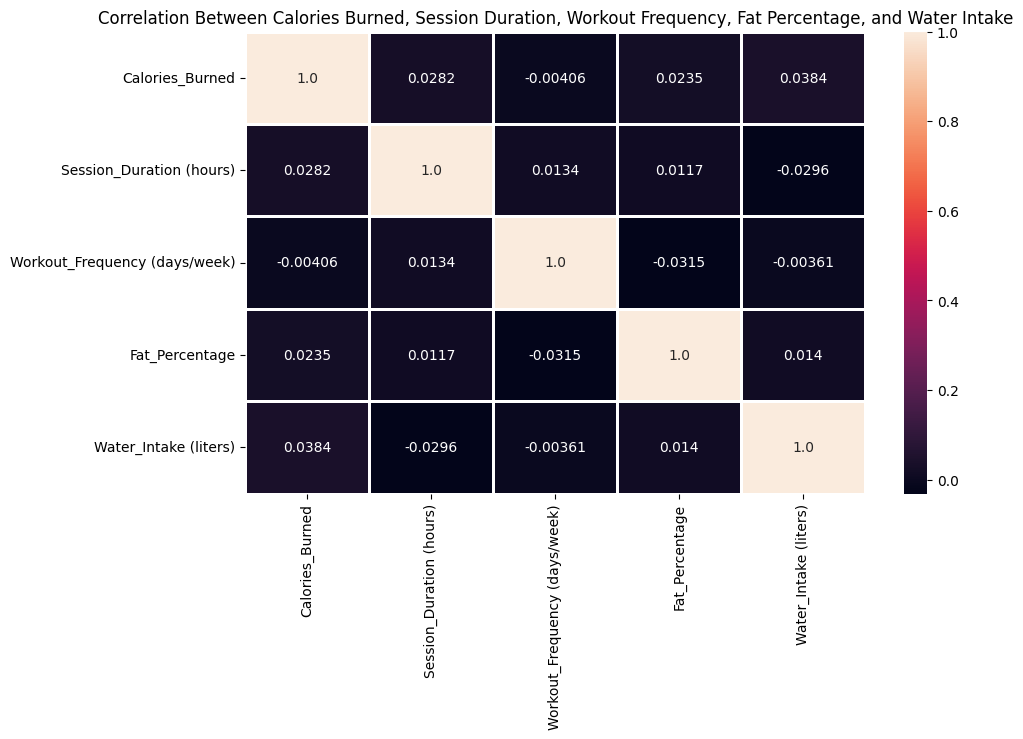

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(fitness_filtered.corr(), annot=True, fmt='.3', linewidth=1, cmap='rocket')
plt.gca().set_title('Correlation Between Calories Burned, Session Duration, Workout Frequency, Fat Percentage, and Water Intake')
plt.show()

**Inference:** There is roughly 0 correlation between calories burned, session duration, workout frequence, fat percentage, and water intake. This kind of surprised me, as I thought at least one of these columns would correlate with another. However, I thought some limitations to take account for that were not included in the dataset could be diet, metabolism, and genetics. We can't necessarily "track" this data, but it does have an affect on the columns presented.

**#3 How accurate can a model predict the experience level based on other factors?**

In [ ]:
experience_train_predictions = fitness_tree.predict(X_train)
experience_train_predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
experience_test_predictions = fitness_tree.predict(X_test)
experience_test_predictions

array([0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 0, 1, 1])

In [ ]:
trainaccuracy = accuracy_score(y_train, experience_train_predictions)
trainaccuracy

0.6444444444444445

In [ ]:
testaccuracy = accuracy_score(y_test, experience_test_predictions)
testaccuracy

0.4222222222222222

**Inference:** The model was able to predict ~43% of the experience levels based on the given data. Reasons why this accuracy score is not higher could be because the data set is not large enough or the columns I used did not reflect well with experience level.